In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# print all locations of shark attacks
attacks = session.query(Measurement) 
for attack in attacks:
    print(attack)

In [11]:
provoked = session.query(Measurement).filter_by(date="2010-05-25")
print(provoked)

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date = ?


In [12]:
engine.execute('select * from Measurement where date = "2010-05-25"').fetchall()

[(127, 'USC00519397', '2010-05-25', 0.0, 77.0),
 (2867, 'USC00513117', '2010-05-25', 0.09, 74.0),
 (5512, 'USC00514830', '2010-05-25', 0.13, 72.0),
 (7651, 'USC00517948', '2010-05-25', 0.0, 76.0),
 (9109, 'USC00518838', '2010-05-25', 0.04, 73.0),
 (9662, 'USC00519523', '2010-05-25', 0.0, 76.0),
 (12332, 'USC00519281', '2010-05-25', 0.33, 72.0),
 (15099, 'USC00511918', '2010-05-25', 0.0, 73.0),
 (17078, 'USC00516128', '2010-05-25', 0.83, 71.0)]

In [13]:
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [14]:
date_range = pd.date_range(start='1/1/2010', end='1/1/2011')
date_range[0]

Timestamp('2010-01-01 00:00:00', freq='D')

In [18]:
date_range_array

['2010-01-01',
 '2010-01-02',
 '2010-01-03',
 '2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-09',
 '2010-01-10',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-16',
 '2010-01-17',
 '2010-01-18',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-23',
 '2010-01-24',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-01-30',
 '2010-01-31',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-06',
 '2010-02-07',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-13',
 '2010-02-14',
 '2010-02-15',
 '2010-02-16',
 '2010-02-17',
 '2010-02-18',
 '2010-02-19',
 '2010-02-20',
 '2010-02-21',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-02-27',
 '2010-02-28',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-06',
 '2010-03-07',
 '2010-03-

In [19]:
if engine.execute('select * from Measurement where date = "2010-01-01"').fetchall()[0][2] == date_range_array[0]:
    print("X")
else:
    print("Y")

X


In [ ]:
a = "2010-05-25"

# Exploratory Climate Analysis

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_range = pd.date_range(start='1/1/2010', end='1/1/2011')
date_range_array = date_range.format(formatter=lambda x: x.strftime('%Y-%m-%d'))
for_dict = []
date_ray = []
prcp_array = []
temp_array = []
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
for x in list(range(0,len(date_range_array))):
    for_dict.append( engine.execute('select date, prcp from Measurement where date = "'+date_range_array[x]+'"').fetchall())
    date_ray.append( date_range_array[x])
    prcp_array.append( engine.execute('select prcp from Measurement where date = "'+date_range_array[x]+'"').fetchall())
    temp_array.append(engine.execute('select tobs from Measurement where date = "'+date_range_array[x]+'"').fetchall())
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [20]:
prcp_array

[[(0.08,), (0.28,), (0.21,), (0.15,), (0.15,), (0.05,), (0.14,)],
 [(0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.02,), (0.01,), (0.0,), (0.0,), (0.0,)],
 [(None,), (0.02,), (0.11,), (0.01,), (0.08,), (0.36,)],
 [(0.06,), (0.38,), (None,), (0.7,), (0.17,), (0.04,), (0.3,)],
 [(0.0,), (0.01,), (0.03,), (0.02,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.01,), (0.01,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.01,)],
 [(0.01,), (0.03,), (0.14,), (0.48,), (0.03,), (0.05,), (0.14,)],
 [(0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,), (0.0,), (0.0,), (0.0,)],
 [(0.0,), (0.0,

In [21]:
len(prcp_array[0])
prcp_mean_list = []
for a in list(range(0,len(date_range_array))):
    ct = 0
    ct2 = 0
    for b in list(range(0,len(prcp_array[a]))):
        try:
            ct = ct + prcp_array[a][b][0]
        except:
            ct2 = ct2 + 1
    try:    
        prcp_mean_list.append(ct/(len(prcp_array[a])-ct2))
    except:
        print("error 2")
        prcp_mean_list.append(0)

len(prcp_mean_list)

366

In [22]:
date_range_array

['2010-01-01',
 '2010-01-02',
 '2010-01-03',
 '2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-09',
 '2010-01-10',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-16',
 '2010-01-17',
 '2010-01-18',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-23',
 '2010-01-24',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-01-30',
 '2010-01-31',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-06',
 '2010-02-07',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-13',
 '2010-02-14',
 '2010-02-15',
 '2010-02-16',
 '2010-02-17',
 '2010-02-18',
 '2010-02-19',
 '2010-02-20',
 '2010-02-21',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-02-27',
 '2010-02-28',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-06',
 '2010-03-07',
 '2010-03-

Text(0, 0.5, 'Parcipitation')

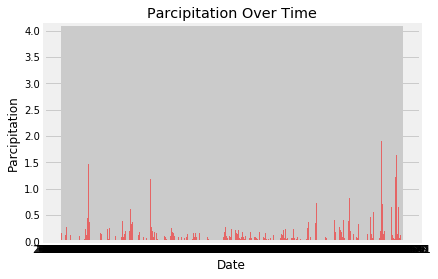

In [23]:
plt.bar(date_range_array, prcp_mean_list, color='r', alpha=0.5, align="center")
plt.title("Parcipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Parcipitation")

In [35]:
df_data = {
    "Date":date_range_array,
    "PRCP":prcp_mean_list
}
df = pd.DataFrame(df_data).set_index('Date')

stat_summery = df.PRCP.describe()
stat_summery

count    366.000000
mean       0.143430
std        0.325573
min        0.000000
25%        0.007778
50%        0.055268
75%        0.155045
max        3.931667
Name: PRCP, dtype: float64

In [73]:
df_data

{'Date': ['2010-01-01',
  '2010-01-02',
  '2010-01-03',
  '2010-01-04',
  '2010-01-05',
  '2010-01-06',
  '2010-01-07',
  '2010-01-08',
  '2010-01-09',
  '2010-01-10',
  '2010-01-11',
  '2010-01-12',
  '2010-01-13',
  '2010-01-14',
  '2010-01-15',
  '2010-01-16',
  '2010-01-17',
  '2010-01-18',
  '2010-01-19',
  '2010-01-20',
  '2010-01-21',
  '2010-01-22',
  '2010-01-23',
  '2010-01-24',
  '2010-01-25',
  '2010-01-26',
  '2010-01-27',
  '2010-01-28',
  '2010-01-29',
  '2010-01-30',
  '2010-01-31',
  '2010-02-01',
  '2010-02-02',
  '2010-02-03',
  '2010-02-04',
  '2010-02-05',
  '2010-02-06',
  '2010-02-07',
  '2010-02-08',
  '2010-02-09',
  '2010-02-10',
  '2010-02-11',
  '2010-02-12',
  '2010-02-13',
  '2010-02-14',
  '2010-02-15',
  '2010-02-16',
  '2010-02-17',
  '2010-02-18',
  '2010-02-19',
  '2010-02-20',
  '2010-02-21',
  '2010-02-22',
  '2010-02-23',
  '2010-02-24',
  '2010-02-25',
  '2010-02-26',
  '2010-02-27',
  '2010-02-28',
  '2010-03-01',
  '2010-03-02',
  '2010-03-03',


In [36]:
df.head()

,PRCP
Date,
2010-01-01,0.151429
2010-01-02,0.002857
2010-01-03,0.000000
2010-01-04,0.001429
2010-01-05,0.005000


In [25]:
station_count = engine.execute('SELECT station ,COUNT(*)  FROM measurement GROUP BY station order by count(*) desc').fetchall()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
station_count[0][1]

2772

In [27]:
print("Station "+station_count[0][0]+" has the most observations, they have "+str(station_count[0][1])+" observations")

Station USC00519281 has the most observations, they have 2772 observations


In [28]:
len(temp_array[0])
temp_mean_list = []

for a in list(range(0,len(date_range_array))):
    ct = 0
    ct2 = 0
    for b in list(range(0,len(temp_array[a]))):
        try:
            ct = ct + temp_array[a][b][0]
        except:
            ct2 = ct2 + 1
    try:    
        temp_mean_list.append(ct/(len(temp_array[a])-ct2))
    except:
        print("error 2")
        temp_mean_list.append("null")

len(temp_mean_list)

366

In [85]:
min(temp_mean_list)

61.5

In [86]:
max(temp_mean_list)

78.0

In [89]:
sum(temp_mean_list)/len(temp_mean_list)

72.3588917078671

In [40]:
df1 = pd.DataFrame(engine.execute('SELECT tobs FROM measurement where station = "'+station_count[0][0]+'"').fetchall())

In [66]:
df2 = pd.DataFrame(engine.execute('SELECT station,  tobs,COUNT(*) FROM measurement GROUP BY station order by count(*) desc').fetchall(),columns = ["station","Temp","Count"])

In [67]:
df2.head(15)

,station,Temp,Count
0,USC00519281,70.0,2772
1,USC00519397,65.0,2724
2,USC00513117,67.0,2709
3,USC00519523,75.0,2669
4,USC00516128,73.0,2612
5,USC00514830,67.0,2202
6,USC00511918,66.0,1979
7,USC00517948,75.0,1372
8,USC00518838,72.0,511


In [70]:
df2.Temp

0    70.0
1    65.0
2    67.0
3    75.0
4    73.0
5    67.0
6    66.0
7    75.0
8    72.0
Name: Temp, dtype: float64

Text(0, 0.5, 'Frequency')

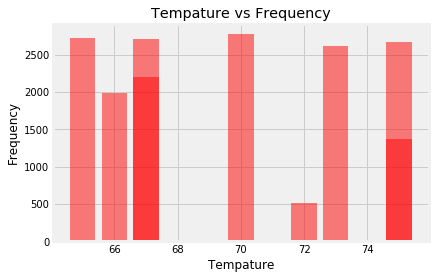

In [72]:
plt.bar(df2.Temp, df2.Count, color='r', alpha=0.5, align="center")
plt.title("Tempature vs Frequency")
plt.xlabel("Tempature")
plt.ylabel("Frequency")

In [74]:
empty_dictionary = {}
for x in list(range(0,len(prcp_mean_list))):
    empty_dictionary.update( {date_range_array[x] : prcp_mean_list[x]} )

In [75]:
empty_dictionary

{'2010-01-01': 0.15142857142857144,
 '2010-01-02': 0.002857142857142857,
 '2010-01-03': 0.0,
 '2010-01-04': 0.0014285714285714286,
 '2010-01-05': 0.005,
 '2010-01-06': 0.11600000000000002,
 '2010-01-07': 0.27499999999999997,
 '2010-01-08': 0.008571428571428572,
 '2010-01-09': 0.002857142857142857,
 '2010-01-10': 0.002857142857142857,
 '2010-01-11': 0.12571428571428572,
 '2010-01-12': 0.002857142857142857,
 '2010-01-13': 0.0033333333333333335,
 '2010-01-14': 0.0,
 '2010-01-15': 0.0,
 '2010-01-16': 0.0,
 '2010-01-17': 0.0,
 '2010-01-18': 0.0,
 '2010-01-19': 0.0,
 '2010-01-20': 0.0014285714285714286,
 '2010-01-21': 0.10833333333333334,
 '2010-01-22': 0.0,
 '2010-01-23': 0.0,
 '2010-01-24': 0.0033333333333333335,
 '2010-01-25': 0.0,
 '2010-01-26': 0.03571428571428571,
 '2010-01-27': 0.2285714285714286,
 '2010-01-28': 0.12166666666666666,
 '2010-01-29': 0.438,
 '2010-01-30': 1.4700000000000002,
 '2010-01-31': 0.36000000000000004,
 '2010-02-01': 0.008333333333333333,
 '2010-02-02': 0.01,
 '2

In [81]:
engine.execute("select station from station").fetchall()[0][0]

'USC00519397'

In [83]:
len(engine.execute("select station from station").fetchall())

9

In [ ]:
temp_dict = {}
for x in list(range(0,len(engine.execute("select station from station").fetchall()))):
    temp_dict.update({engine.execute("select station from station").fetchall()[x][0]})

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
